In [34]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [27]:
df = pd.read_csv('/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/2_titanic_dataset.csv')

In [23]:
def create_connection(database):
    try:
        conn = sqlite3.connect(database) # the connection object
        return conn 
    except Error as e:
        print(e)
    
    return None

In [28]:
database = '/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/Titanic.db'
conn = create_connection(database)

query= 'SELECT * FROM passengers'
df=pd.read_sql_query(query,conn)
conn.close()
df.tail()

In [29]:
# Clean 'Name' column by separating titles in a new column

In [30]:
# define a function get_title to extract titles from the Name

In [7]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\. ', name)
    if title_search:
        return title_search.group(1)
    return ""

# create a new column named 'Title' where you store the extracted titles (Mr., Mrs. etc
df['Title']=df['Name'].apply(get_title)

In [8]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

#### replacing data

In [13]:
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')

In [14]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

#### mapping age range

In [32]:
df.loc[df['Age'] <= 16, 'NumericAge'] = 0 
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'NumericAge'] = 1 
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'NumericAge'] = 2 
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'NumericAge'] = 3 
df.loc[df['Age'] > 64, 'NumericAge'] = 4 

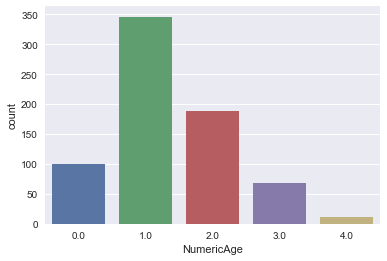

In [35]:
sns.countplot(df['NumericAge'])

In [36]:
df['CategoricalAge']=pd.cut(df['Age'],5)

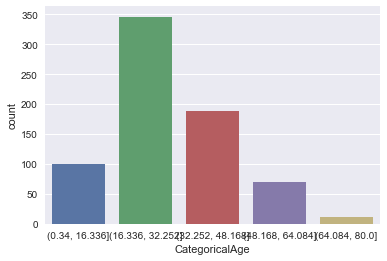

In [38]:
sns.countplot(df['CategoricalAge'])

In [45]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

df['person'] = df[['Age', 'Sex']].apply(get_person, axis=1)

In [46]:
df.person.unique

<bound method Series.unique of 0        male
1      female
2      female
3      female
4        male
5        male
6        male
7       child
8      female
9       child
10      child
11     female
12       male
13       male
14      child
15     female
16      child
17       male
18     female
19     female
20       male
21       male
22      child
23       male
24      child
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869     child
870      male
871    female
872      male
873      male
874    female
875     child
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: person, Length: 891, dtype: object>